In [1]:
import torch, torchvision, numpy as np
from PIL import Image
import requests
import matplotlib.pylab as plt

torch.__version__, torchvision.__version__

('2.0.0+cu118', '0.15.1+cu118')

(2500, 2392, 3)


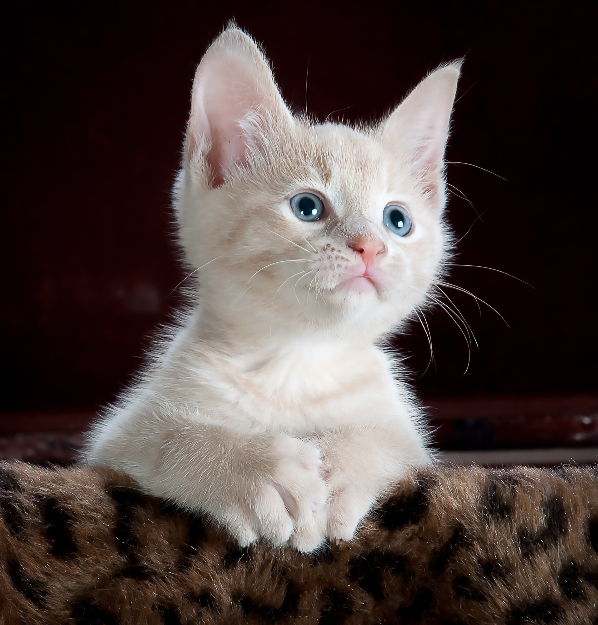

In [10]:
url = "https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg"
image = Image.open(requests.get(url, stream=True).raw)

print(np.array(image).shape)
Image.fromarray(np.array(image)[::4,::4])

In [2]:
device = 'cuda'
model = torchvision.models.resnet50(weights=torchvision.models.ResNet50_Weights.DEFAULT).to(device)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 67.2MB/s]


In [12]:
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

In [13]:
model.requires_grad_(False)
activation = {}
model.conv1.register_forward_hook(get_activation('conv1'))
model.layer1.register_forward_hook(get_activation('layer1'))
model.layer2.register_forward_hook(get_activation('layer2'))
model.layer3.register_forward_hook(get_activation('layer3'))
model.layer4.register_forward_hook(get_activation('layer4'))

transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),torchvision.transforms.Resize(224, antialias=True)])
print(torch.argmax(model(transform(image).unsqueeze(0).to(device)),1))
#https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/
# 283 = persian cat

tensor([283], device='cuda:0')


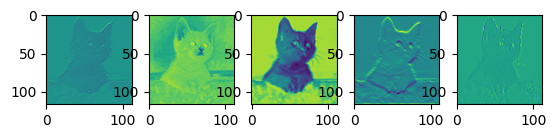

In [14]:
mm = activation['conv1'].squeeze().cpu().numpy()
fig, axs = plt.subplots(1,5);[axs[i].imshow(mm[j]) for i, j in enumerate(range(10,15))];plt.show(block=False)

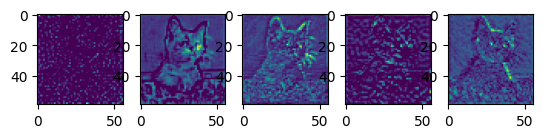

In [15]:
mm = activation['layer1'].squeeze().cpu().numpy()
fig, axs = plt.subplots(1,5);[axs[i].imshow(mm[j]) for i, j in enumerate(range(10,15))];plt.show(block=False)

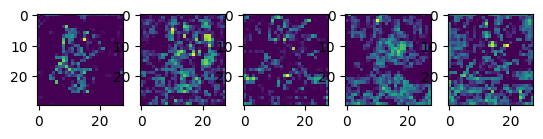

In [16]:
mm = activation['layer2'].squeeze().cpu().numpy()
fig, axs = plt.subplots(1,5);[axs[i].imshow(mm[j]) for i, j in enumerate(range(10,15))];plt.show(block=False)

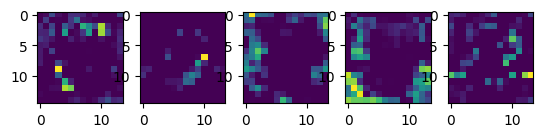

In [17]:
mm = activation['layer3'].squeeze().cpu().numpy()
fig, axs = plt.subplots(1,5);[axs[i].imshow(mm[j]) for i, j in enumerate(range(10,15))];plt.show(block=False)

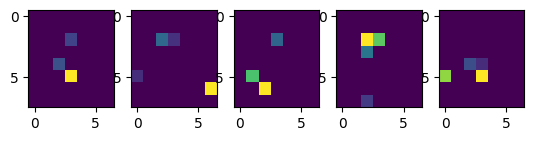

In [18]:
mm = activation['layer4'].squeeze().cpu().numpy()
fig, axs = plt.subplots(1,5);[axs[i].imshow(mm[j]) for i, j in enumerate(range(10,15))];plt.show(block=False)